### Convertendo uma coluna de um Dataframe do Pandas

repositório: https://github.com/programacaodinamica/dicas-pandas 

Exemplo de problema: coluna de preços está assim R$ 10,50

In [ ]:
# coluna de preços está assim: R$ 10,50 (formato string e com , --> pandas não consegue ler)
FILE_PATH = '../dados/TA_PRECO_MEDICAMENTO_GOV.csv'

In [ ]:
meds = pd.read_csv(FILE_PATH, encoding="ISO-8859-1", sep=';')

In [ ]:
# função info vai retornar que tipo de variável tem em cada coluna
meds.info()

In [ ]:
# seleciona a coluna e aplica a função lambda para substituir vírgulas por pontos
meds['PF Sem Impostos'] = meds['PF Sem Impostos'].apply(lambda x: str(x).replace(",","."))

In [ ]:
# agora que os preços estão assim 10.50, podemos converê-los de string para float com a função astype
meds['PF Sem Impostos'] = meds['PF Sem Impostos'].astype('float64')

In [ ]:
# para confirmar que deu certo, tire a média
meds['PF Sem Impostos'].mean()

### Modificando o tamanho das colunas de um Dataframe

Exemplo de problema: texto dentro da coluna é muito grande e não está sendo possível visualizar a string inteira

In [ ]:
# pedir pro pandas mostrar qual é o valor de comprimento atribuído a essa coluna
pd.get_option('max_colwidth')

In [ ]:
# checando qual é a len real dos caracteres da coluna 
meds['APRESENTAÇÃO'].str.len().max()

In [ ]:
# usar a função set para estabelecer o novo máximo
pd.set_option('max_colwidth',170)

In [ ]:
# Em caso do Datafram suprimir colunas na hora da visualização, usar método max columns
pd.get_option('max_columns')

In [ ]:
# Setar a visualização para mostrar todas as colunas (isso só é possivel se forem poucas)
pd.set_option('max_columns', 50) 

### Ordenar resultados

Exemplo de problema: como posso fazer um sort nos valores do describe? Quero ver o mean na ordem

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('avocado.csv')

In [3]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany
4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany


In [4]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,27323.000000,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,27323.000000,27323.000000
mean,1.400632,9.135469e+05,2.953187e+05,2.901059e+05,2.215868e+04,3.058740e+05,2.186982e+05,8.202537e+04,5150.387571,2016.956593
std,0.385439,3.702672e+06,1.273010e+06,1.187227e+06,1.031329e+05,1.274851e+06,8.881292e+05,3.917356e+05,30719.207766,1.406539
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.110000,1.361412e+04,7.964250e+02,2.922980e+03,0.000000e+00,7.703605e+03,5.283050e+03,2.773700e+02,0.000000,2016.000000
50%,1.370000,1.198654e+05,1.003785e+04,2.568849e+04,1.926900e+02,4.775039e+04,3.223150e+04,4.312490e+03,0.000000,2017.000000
75%,1.640000,4.747205e+05,1.133179e+05,1.454464e+05,5.898300e+03,1.461021e+05,1.048424e+05,3.268494e+04,450.665000,2018.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,2.347299e+07,1.543625e+07,8.378356e+06,844929.830000,2019.000000


In [5]:
# atribuir como você quer ordenar usando by e estabelecendo axis =1
# agora está ordenado conforme a média
df.describe().sort_values(by='mean',axis=1)

,AveragePrice,year,XLarge Bags,4770,Large Bags,Small Bags,4225,4046,Total Bags,Total Volume
count,27323.000000,27323.000000,27323.000000,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04
mean,1.400632,2016.956593,5150.387571,2.215868e+04,8.202537e+04,2.186982e+05,2.901059e+05,2.953187e+05,3.058740e+05,9.135469e+05
std,0.385439,1.406539,30719.207766,1.031329e+05,3.917356e+05,8.881292e+05,1.187227e+06,1.273010e+06,1.274851e+06,3.702672e+06
min,0.440000,2015.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.456000e+01
25%,1.110000,2016.000000,0.000000,0.000000e+00,2.773700e+02,5.283050e+03,2.922980e+03,7.964250e+02,7.703605e+03,1.361412e+04
50%,1.370000,2017.000000,0.000000,1.926900e+02,4.312490e+03,3.223150e+04,2.568849e+04,1.003785e+04,4.775039e+04,1.198654e+05
75%,1.640000,2018.000000,450.665000,5.898300e+03,3.268494e+04,1.048424e+05,1.454464e+05,1.133179e+05,1.461021e+05,4.747205e+05
max,3.250000,2019.000000,844929.830000,2.546439e+06,8.378356e+06,1.543625e+07,2.047057e+07,2.274362e+07,2.347299e+07,6.371614e+07


In [6]:
# transposição do dataframe para poder visualizar melhor
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,27323.0,1.400632,3.854387e-01,0.44,1.110,1.37,1.640,3.25
Total Volume,27323.0,913546.935291,3.702672e+06,84.56,13614.120,119865.41,474720.520,63716144.15
4046,27323.0,295318.733122,1.273010e+06,0.00,796.425,10037.85,113317.895,22743616.17
4225,27323.0,290105.934224,1.187227e+06,0.00,2922.980,25688.49,145446.395,20470572.61
4770,27323.0,22158.678189,1.031329e+05,0.00,0.000,192.69,5898.300,2546439.11
Total Bags,27323.0,305873.958118,1.274851e+06,0.00,7703.605,47750.39,146102.060,23472988.69
Small Bags,27323.0,218698.197257,8.881292e+05,0.00,5283.050,32231.50,104842.350,15436246.72
Large Bags,27323.0,82025.372208,3.917356e+05,0.00,277.370,4312.49,32684.940,8378355.78
XLarge Bags,27323.0,5150.387571,3.071921e+04,0.00,0.000,0.00,450.665,844929.83
year,27323.0,2016.956593,1.406539e+00,2015.00,2016.000,2017.00,2018.000,2019.00


In [7]:
# unindo as duas dicas para visualização: sort_values by mean com transposição T
# é importante retirar o axis = 1 já que você está transpondo a tabela
df.describe().T.sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
AveragePrice,27323.0,1.400632,3.854387e-01,0.44,1.110,1.37,1.640,3.25
year,27323.0,2016.956593,1.406539e+00,2015.00,2016.000,2017.00,2018.000,2019.00
XLarge Bags,27323.0,5150.387571,3.071921e+04,0.00,0.000,0.00,450.665,844929.83
4770,27323.0,22158.678189,1.031329e+05,0.00,0.000,192.69,5898.300,2546439.11
Large Bags,27323.0,82025.372208,3.917356e+05,0.00,277.370,4312.49,32684.940,8378355.78
Small Bags,27323.0,218698.197257,8.881292e+05,0.00,5283.050,32231.50,104842.350,15436246.72
4225,27323.0,290105.934224,1.187227e+06,0.00,2922.980,25688.49,145446.395,20470572.61
4046,27323.0,295318.733122,1.273010e+06,0.00,796.425,10037.85,113317.895,22743616.17
Total Bags,27323.0,305873.958118,1.274851e+06,0.00,7703.605,47750.39,146102.060,23472988.69
Total Volume,27323.0,913546.935291,3.702672e+06,84.56,13614.120,119865.41,474720.520,63716144.15


### Verificar se dois conjuntos de dados são iguais

In [8]:
import pandas as pd
from pandas.testing import assert_frame_equal

In [9]:
df1 = pd.DataFrame({'a': [1, 2], 'b': [3, 4]})
df2 = pd.DataFrame({'a': [1, 2], 'b': [3.0, 4.0]})

In [10]:
assert_frame_equal(df1, df2, check_dtype=False) # estou pedindo pra ele ignorar que os tipos são diferentes (int e float)
# se é igual, não retorna nada

In [11]:
df3 = pd.DataFrame({'a': [1, 2], 'b': [3, 4]})
df4 = pd.DataFrame({'a': [1, 2], 'b': [3.01, 4.01]})

### Como usar group by

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('train.csv')

In [14]:
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [15]:
colunas_selecionadas = ['TP_SEXO', 'NU_NOTA_REDACAO']

In [16]:
# criando um dataframe somente com as colunas que quero do df original 
microdados_sexo = df.filter(items=colunas_selecionadas) 

In [17]:
microdados_sexo.head()

,TP_SEXO,NU_NOTA_REDACAO
0,M,520.0
1,F,580.0
2,F,NaN
3,F,NaN
4,M,NaN


In [18]:
# retirando os NaN
microdados_sexo = microdados_sexo.dropna()

In [19]:
microdados_sexo.head()

,TP_SEXO,NU_NOTA_REDACAO
0,M,520.0
1,F,580.0
5,F,620.0
6,F,560.0
7,F,620.0


In [20]:
# contando a quantidade de masculino e feminino  declarados
microdados_sexo.groupby('TP_SEXO').count()

,NU_NOTA_REDACAO
TP_SEXO,
F,6261
M,3872


In [21]:
# checando qual foi a nota maxima de cada sexo

In [22]:
microdados_sexo.groupby('TP_SEXO').max()

,NU_NOTA_REDACAO
TP_SEXO,
F,1000.0
M,980.0


In [23]:
# encontrar as notas mínimas que foram maior do que 0: datafram.nome da coluna e passar agrupamento e mínimo
microdados_sexo[microdados_sexo.NU_NOTA_REDACAO > 0].groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,60.0
M,40.0


In [24]:
# agrupando pela media
microdados_sexo.groupby('TP_SEXO').mean()

,NU_NOTA_REDACAO
TP_SEXO,
F,539.159879
M,512.697831


In [25]:
# agrupando pela mediana
microdados_sexo.groupby('TP_SEXO').median()

,NU_NOTA_REDACAO
TP_SEXO,
F,540.0
M,520.0


TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

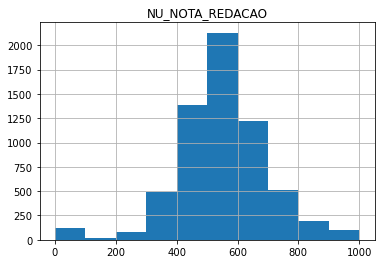

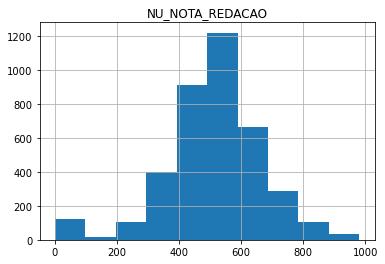

In [26]:
# plotando histograma do agrupamento
microdados_sexo.groupby('TP_SEXO').hist()

In [27]:
# aplicando método describe em group by
microdados_sexo.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F                6261.0  539.159879  149.409216  0.0  460.0  540.0  620.0   
M                3872.0  512.697831  160.560609  0.0  440.0  520.0  600.0   

                 
            max  
TP_SEXO          
F        1000.0  
M         980.0

### Exportar para csv

In [46]:
# csv com novo agrupamento vai aparecer na lista de arquivos do jupyter
microdados_sexo.to_csv("microdados genero") 